In [816]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [817]:
df = pd.read_csv('./data2.txt',sep=',',names=["X", "Y"])

# Q1) Plot the Data

Text(0, 0.5, 'Y')

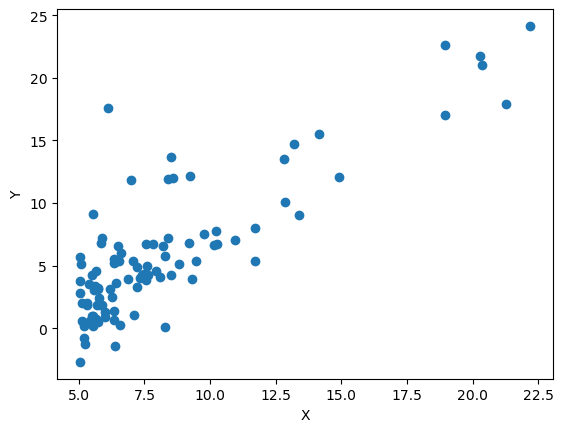

In [818]:
plt.scatter(df["X"],df["Y"])
plt.xlabel("X")
plt.ylabel("Y")

# Q2) Normal Equation

In [819]:
# Calculating coefficients using normal equation

#Adding x0=1 to each instance for the interception.
X_with_intercept = np.c_[np.ones((np.array(df["X"].tolist()).shape[0], 1)), np.array(df["X"].tolist())]
#converting columns to 2D Array using numpy
y = np.array(df["Y"].tolist())
# Calculating X Transpose inverse using numpy linear algebra model
xTransposeX_Inverse = np.linalg.inv(np.dot(np.transpose(X_with_intercept), X_with_intercept))
# Calulating dot product of X transpose inverse and X transpose
xTransposeX_Inverse_xTranspose = np.dot(xTransposeX_Inverse,np.transpose(X_with_intercept))
# Calculating Theeta (Coefficients)
theta = np.dot(xTransposeX_Inverse_xTranspose,y)

In [820]:
print(theta)

[-3.89578088  1.19303364]


In [821]:
linearRegression1 = []
m = theta[1]
b = theta[0]
for i in range(0,len(df.X)):
    linearRegression1.append(m*df.X[i] + b)

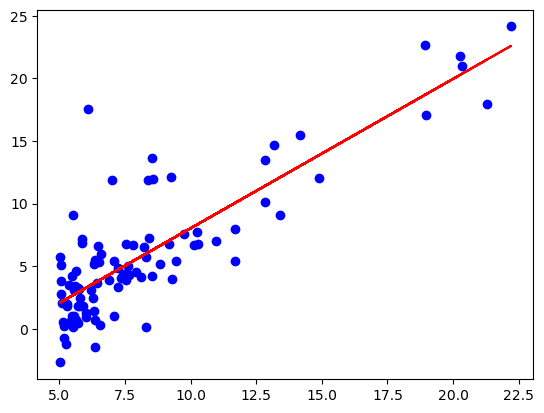

In [822]:
plt.scatter(df.X,df.Y,color="blue")
plt.plot(df.X,linearRegression1, color="red")

In [823]:
from sklearn.model_selection import train_test_split

In [824]:
#Split training and testing data using sklearn model selection.
X_train,X_test,y_train,y_test = train_test_split(df['X'],df['Y'],test_size=0.2, random_state=101)

# Q3) Gradient Descent - Batch 

In [825]:
#Error function (cost function). To minimze the error function we need to vary the values
#of m(slope of the linear regression line) and b (y intercept).
# We are using gradient descent to perform linear regression
def error_function(m,b,L,x_train,y_train):
    pd_m = 0
    pd_b = 0
    for i in range(0,len(x_train)):
        x = x_train[i]
        y = y_train[i]
        #Calculating partial derivative wrt m and b individually
        pd_m = pd_m + (-2/len(x_train))*(x*(y -(m*x+b)))
        pd_b = pd_b + (-2/len(x_train))*(y -(m*x+b))
        
    new_m = m-(L*pd_m)
    new_b = b-(L*pd_b)
    return new_m,new_b

In [826]:
def MSE(m,b, X, y):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (y[i] - (m * X[i] + b)) ** 2
    return total_cost / float(len(X))

In [827]:
# Training Set
m = 0
b = 0
L = 0.002
epoch = 10000

mse_training = []
mse_testing = []
for i in range(0,epoch):
    m,b = error_function(m,b,L,X_train.tolist(),y_train.tolist())
    mse_training.append(MSE(m,b,X_train.tolist(),y_train.tolist()))
    mse_testing.append(MSE(m,b,X_test.tolist(),y_test.tolist()))

Text(0, 0.5, 'MSE')

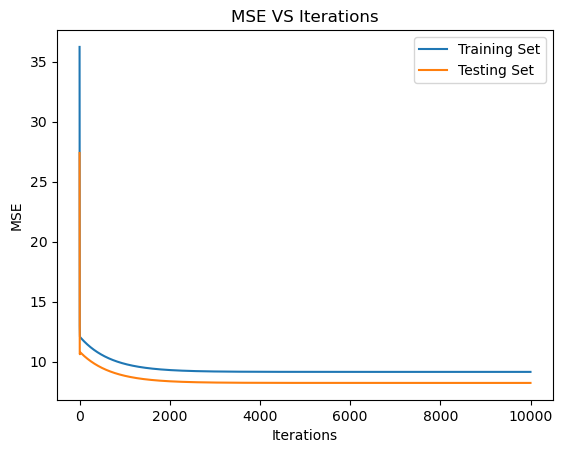

In [828]:
# figure, axis = plt.subplots(2,1,figsize=(10, 10))
plt.plot(mse_training,label="Training Set")
plt.plot(mse_testing,label="Testing Set")
plt.legend()
plt.title("MSE VS Iterations")
plt.xlabel("Iterations")
plt.ylabel("MSE")


# MSE is constant after 4000 iterations.

Text(0.5, 1.0, 'Testing data vs Prediction')

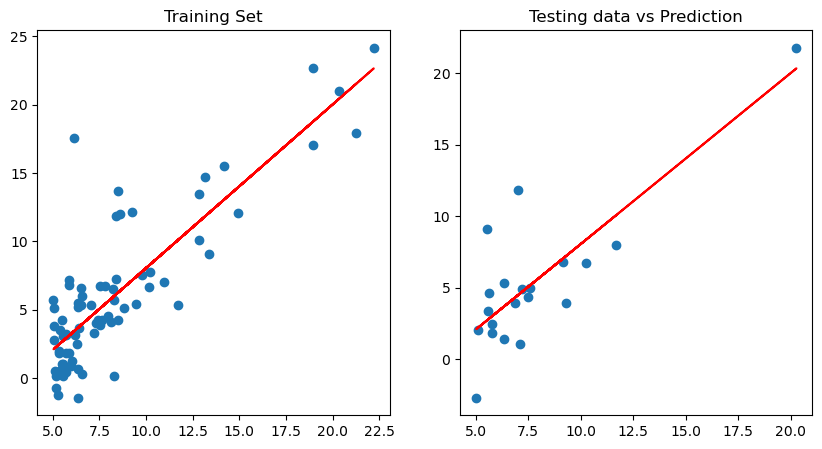

In [829]:
linear_regression2 = []
X_trainList = X_train.tolist()
for i in range(0,len(X_train)):
    linear_regression2.append(m*X_trainList[i] + b)
# print(linear_regression)
figure, axis = plt.subplots(1,2,figsize=(10, 5))
axis[0].scatter(X_trainList,y_train.tolist())
axis[0].plot(X_trainList,linear_regression2,color = "red")
axis[0].set_title("Training Set")


y_test_pred = []
X_testList = X_test.tolist()
for i in range(0,len(X_testList)):
    y_test_pred.append(m*X_testList[i] + b)
# print(linear_regression)
axis[1].scatter(X_testList,y_test.tolist())
axis[1].plot(X_testList,y_test_pred,color = "red")
axis[1].set_title("Testing data vs Prediction")

In [830]:
# Computing the accuracy of the model

import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 2.02
Mean squared error = 8.22
Median absolute error = 1.51
Explain variance score = 0.66
R2 score = 0.66


In [831]:
learningRateArr = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006,0.007, 0.008, 0.009, 0.01]
mse_testing = []
# figure, axis = plt.subplots(5,2,figsize=(10, 20))
for L in learningRateArr:    
    m = 0
    b = 0
    epoch = 4000
    for i in range(0,epoch):
        m,b = error_function(m,b,L,X_train.tolist(),y_train.tolist())
    mse_testing.append(MSE(m,b,X_test.tolist(),y_test.tolist()))
print(mse_testing)

[8.361039757248292, 8.231984835101553, 8.225078602940455, 8.224668442178956, 8.224635114876783, 8.224630634007342, 8.224629776238867, 8.224629589907808, 8.224629548099703, 8.224629538651559]


Text(0.5, 1.0, 'MSE vs Learning Rate')

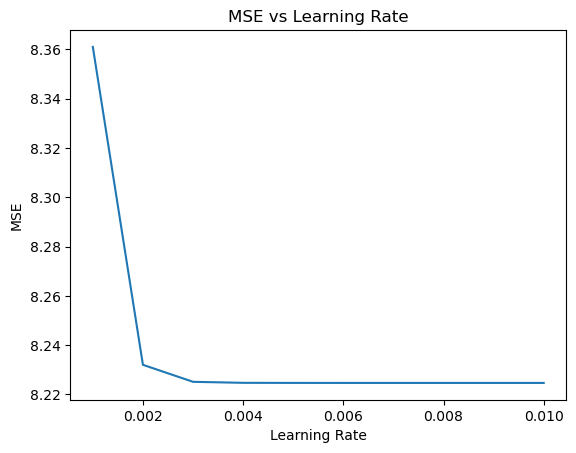

In [832]:
plt.plot(learningRateArr,mse_testing)
plt.xlabel("Learning Rate")
plt.ylabel("MSE")
plt.title("MSE vs Learning Rate")

# Best learning rate according to my analysis is 0.004. As per the chart, MSE is constant after 0.004.

# Stochastic Gradient Descent

In [833]:
#Split training and testing data using sklearn model selection.
X_train,X_test,y_train,y_test = train_test_split(df['X'],df['Y'],test_size=0.2, random_state=101)

In [834]:
#Error function for SGD
import random
def error_function2(m,b,L,x_train,y_train):
    pd_m = 0
    pd_b = 0
    for i in range(0,len(x_train)):
        randomNumber = random.randrange(1,len(X_train))
        x = x_train[randomNumber]
        y = y_train[randomNumber]
        #Calculating partial derivative wrt m and b individually
        pd_m = pd_m + (-2/len(x_train))*(x*(y -(m*x+b)))
        pd_b = pd_b + (-2/len(x_train))*(y -(m*x+b))
        
    new_m = m-(L*pd_m)
    new_b = b-(L*pd_b)
    return new_m,new_b

In [835]:
m = 0
b = 0
L = 0.004
epoch = 2000
mse_training = []
mse_testing = []
for i in range(0,epoch):
    m,b = error_function2(m,b,L,X_train.tolist(),y_train.tolist())
    mse_training.append(MSE(m,b,X_train.tolist(),y_train.tolist()))
    mse_testing.append(MSE(m,b,X_test.tolist(),y_test.tolist()))
print(m,b)

1.1236043837332876 -3.739354883877112


Text(0, 0.5, 'MSE')

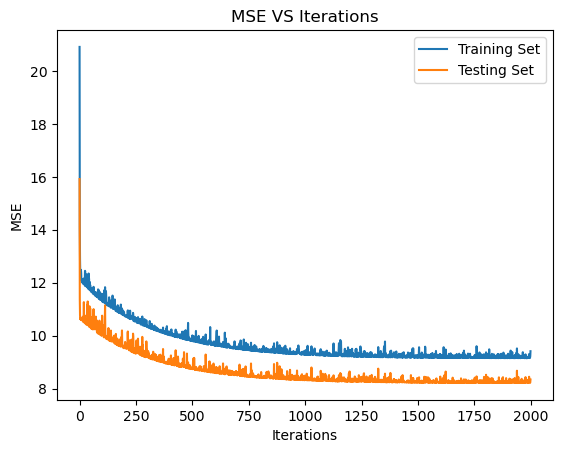

In [836]:
plt.plot(mse_training,label="Training Set")
plt.plot(mse_testing,label="Testing Set")
plt.legend()
plt.title("MSE VS Iterations")
plt.xlabel("Iterations")
plt.ylabel("MSE")

Text(0.5, 1.0, 'Testing data vs Prediction')

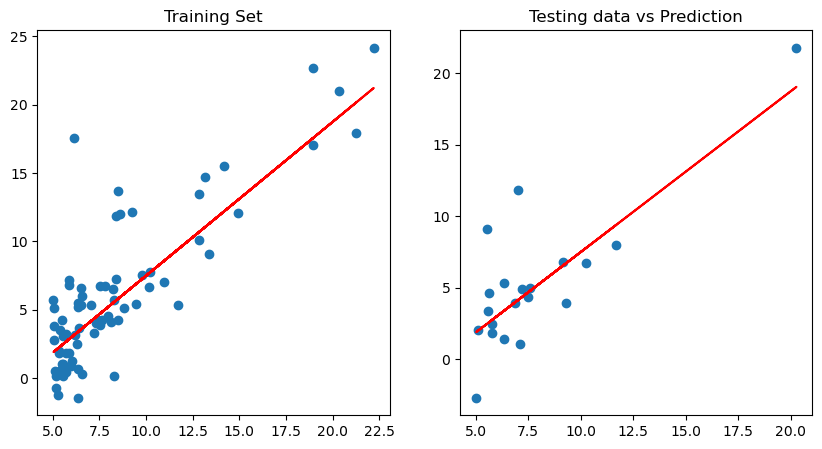

In [837]:
linear_regressionSGD = []
X_trainList = X_train.tolist()
for i in range(0,len(X_train)):
    linear_regressionSGD.append(m*X_trainList[i] + b)
# print(linear_regression)
figure, axis = plt.subplots(1,2,figsize=(10, 5))
axis[0].scatter(X_trainList,y_train.tolist())
axis[0].plot(X_trainList,linear_regressionSGD,color = "red")
axis[0].set_title("Training Set")


y_test_pred = []
X_testList = X_test.tolist()
for i in range(0,len(X_testList)):
    y_test_pred.append(m*X_testList[i] + b)
# print(linear_regression)
axis[1].scatter(X_testList,y_test.tolist())
axis[1].plot(X_testList,y_test_pred,color = "red")
axis[1].set_title("Testing data vs Prediction")

In [838]:
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 1.97
Mean squared error = 8.34
Median absolute error = 1.23
Explain variance score = 0.65
R2 score = 0.65


In [839]:
learningRateArr = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006,0.007, 0.008, 0.009, 0.01]
mse_testing = []
# figure, axis = plt.subplots(5,2,figsize=(10, 20))
for L in learningRateArr:
    m = 0
    b = 0
    epoch = 4000
    for i in range(0,epoch):
        m,b = error_function(m,b,L,X_train.tolist(),y_train.tolist())
    mse_testing.append(MSE(m,b,X_test.tolist(),y_test.tolist()))
print(mse_testing)

[8.361039757248292, 8.231984835101553, 8.225078602940455, 8.224668442178956, 8.224635114876783, 8.224630634007342, 8.224629776238867, 8.224629589907808, 8.224629548099703, 8.224629538651559]


Text(0.5, 1.0, 'MSE vs Learning Rate')

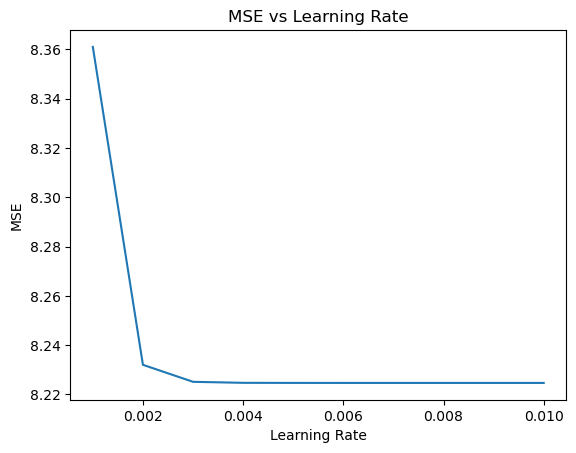

In [840]:
plt.plot(learningRateArr,mse_testing)
plt.xlabel("Learning Rate")
plt.ylabel("MSE")
plt.title("MSE vs Learning Rate")

# SGD converge faster than BGD

# BGD less noisy than SGD because it averages over a mini-batch of examples, resulting in more stable convergence.